In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS') 
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
def print_percentiles(c, name):
    if c == 0:
        return null
    else:
        print('-----------------------------\n')
        print('percentile values distribution for %s\n' % name)

        print('20th Percentile:%f\n' % c.Percentile(20))    
        print('25th Percentile:%f\n' % c.Percentile(25))
        print('40th Percentile:%f\n' % c.Percentile(40))
        print('50th Percentile:%f\n' % c.Percentile(50))
        print('60th Percentile:%f\n' % c.Percentile(60))
        print('75th Percentile:%f\n' % c.Percentile(75))
        print('80th Percentile:%f\n' % c.Percentile(80))    
        print('90th Percentile:%f\n' % c.Percentile(90))
        print('99th Percentile:%f\n' % c.Percentile(99))

        print('-----------------------------\n')

In [3]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [4]:
%autosave 20

Autosaving every 20 seconds


In [5]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
tcp_tls_data = "./AWS_results/SaoPaulo/data/output_curl_data.csv"
quic_data = "./AWS_results/SaoPaulo/data/output_quic.csv"

In [8]:
scol_names = ['TimeOfMeasurement', 'Url', 'Ip', 'Port', 'DnsLookupTime', 'TCPHandshakeTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'HTTPVersion', 'Protocol']
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']

In [9]:
t = pd.read_csv(quic_data, ';', names=tcol_names, header=None)
s = pd.read_csv(tcp_tls_data, ';', names=scol_names, header=None)

In [10]:
t = t.dropna()
s = s.dropna()

In [11]:
#t = t[t['TimeOfMeasurement'] > 1581721201]
#s = s[s['TimeOfMeasurement'] > 1581721201]

In [12]:
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [13]:
s.count()

TimeOfMeasurement              304375
Url                            304375
Ip                             304375
Port                           304375
DnsLookupTime                  304375
TCPHandshakeTime               304375
ConnectionEstablishmentTime    304375
TTFB                           304375
TotalDownloadTime              304375
HttpResponse                   304375
HTTPVersion                    304375
Protocol                       304375
dtype: int64

In [14]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,1589644802,www.google.com,172.217.28.132,443,4.358,23.293,121.810,202.558,208.643,200,HTTP/1.1,TCP/TLS1.2
1,1589644802,www.google.com,172.217.28.132,443,4.324,0.791,85.857,178.309,181.190,200,HTTP2,TCP/TLS1.2
2,1589644802,facebook.com,157.240.12.35,443,4.218,0.705,159.060,304.307,304.342,301,HTTP/1.1,TCP/TLS1.2
3,1589644803,facebook.com,157.240.12.35,443,4.215,0.677,158.311,299.888,299.923,301,HTTP/1.1,TCP/TLS1.3
4,1589644803,facebook.com,157.240.12.35,443,4.225,0.670,159.228,301.296,301.341,301,HTTP2,TCP/TLS1.2


In [15]:
t.count()

TimeOfMeasurement              719206
Url                            719206
Path                           719206
Ip                             719206
Port                           719206
DNSTime                        719206
ConnectionEstablishmentTime    719206
TTFB                           719206
TotalDownloadTime              719206
HttpResponse                   719206
Protocol                       719206
dtype: int64

In [16]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,165.824,94.965,295.938,458.868,404.0,Q043
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.879,100.239,304.954,708.229,404.0,Q046
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.894,100.598,313.368,715.168,404.0,Q050
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,163.712,97.075,292.238,454.798,404.0,Q043
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,0.874,94.907,294.142,697.891,404.0,Q046


In [17]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [18]:
s['TimeOfMeasurement'] = s['TimeOfMeasurement'].apply(timestamp2human)

In [19]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 18:00:02 2020,www.google.com,172.217.28.132,443,4.358,23.293,121.810,202.558,208.643,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 18:00:02 2020,www.google.com,172.217.28.132,443,4.324,0.791,85.857,178.309,181.190,200,HTTP2,TCP/TLS1.2
2,Sat May 16 18:00:02 2020,facebook.com,157.240.12.35,443,4.218,0.705,159.060,304.307,304.342,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 18:00:03 2020,facebook.com,157.240.12.35,443,4.215,0.677,158.311,299.888,299.923,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 18:00:03 2020,facebook.com,157.240.12.35,443,4.225,0.670,159.228,301.296,301.341,301,HTTP2,TCP/TLS1.2


In [20]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
304370,Wed May 20 18:13:04 2020,kttc.ru,148.251.153.112,443,80.021,207.637,22737.992,22979.123,22979.159,200,HTTP2,TCP/TLS1.2
304371,Wed May 20 18:13:25 2020,fortstore.net,188.165.4.35,443,488.336,209.435,25800.081,26042.912,26042.945,403,HTTP/1.1,TCP/TLS1.2
304372,Wed May 20 18:13:30 2020,pictasite.com,91.195.240.94,443,244.947,243.112,27958.727,28168.229,28168.258,403,HTTP/1.1,TCP/TLS1.2
304373,Wed May 20 18:13:32 2020,boxden.com,104.26.0.65,443,447.546,3.426,13790.619,13830.957,13830.987,403,HTTP/1.1,TCP/TLS1.2
304374,Wed May 20 18:13:33 2020,vcb-s.com,47.246.22.184,443,1721.118,162.103,15998.536,17110.302,17643.172,200,HTTP/1.1,TCP/TLS1.2


In [21]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [22]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,165.824,94.965,295.938,458.868,404.0,Q043
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.879,100.239,304.954,708.229,404.0,Q046
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.894,100.598,313.368,715.168,404.0,Q050
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,163.712,97.075,292.238,454.798,404.0,Q043
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,0.874,94.907,294.142,697.891,404.0,Q046


In [23]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2044629,1.589991e+09,www.vstrokax.net,/,208.88.226.236,443,2.102,367.459,527.913,527.983,301.0,Q050
2044631,1.589991e+09,www.aabiertaalfonsoviii.blogspot.com,/,172.217.29.225,443,81.868,162.266,453.552,453.647,301.0,Q050
2044632,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,199.852,166.587,368.815,368.885,301.0,Q043
2044637,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,42.789,160.420,362.691,362.778,301.0,Q046
2044640,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,85.936,168.939,369.464,369.543,301.0,Q050


In [24]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [25]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [26]:
quic4.count()

TimeOfMeasurement              719206
Url                            719206
Path                           719206
Ip                             719206
Port                           719206
DNSTime                        719206
ConnectionEstablishmentTime    719206
TTFB                           719206
TotalDownloadTime              719206
HttpResponse                   719206
Protocol                       719206
dtype: int64

In [27]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,165.824,94.965,295.938,458.868,404.0,Q043
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.879,100.239,304.954,708.229,404.0,Q046
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.894,100.598,313.368,715.168,404.0,Q050
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,163.712,97.075,292.238,454.798,404.0,Q043
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,0.874,94.907,294.142,697.891,404.0,Q046


In [28]:
quic6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [29]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [30]:
#tcp4, tcp6 = filter_by_ip(s, column = 'Ip')
tcp4 = s[s['Ip'].str.contains("\.")]
tcp6 = s[s['Ip'].str.contains("\:")]

In [31]:
tcp4.count()

TimeOfMeasurement              304375
Url                            304375
Ip                             304375
Port                           304375
DnsLookupTime                  304375
TCPHandshakeTime               304375
ConnectionEstablishmentTime    304375
TTFB                           304375
TotalDownloadTime              304375
HttpResponse                   304375
HTTPVersion                    304375
Protocol                       304375
dtype: int64

In [32]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 18:00:02 2020,www.google.com,172.217.28.132,443,4.358,23.293,121.810,202.558,208.643,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 18:00:02 2020,www.google.com,172.217.28.132,443,4.324,0.791,85.857,178.309,181.190,200,HTTP2,TCP/TLS1.2
2,Sat May 16 18:00:02 2020,facebook.com,157.240.12.35,443,4.218,0.705,159.060,304.307,304.342,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 18:00:03 2020,facebook.com,157.240.12.35,443,4.215,0.677,158.311,299.888,299.923,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 18:00:03 2020,facebook.com,157.240.12.35,443,4.225,0.670,159.228,301.296,301.341,301,HTTP2,TCP/TLS1.2


In [33]:
tcp6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [34]:
tcp6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [35]:
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic46 = quic4.loc[t['Protocol'] == 'Q046']
quic50 = quic4.loc[t['Protocol'] == 'Q050']
quicID24 = quic4.loc[t['Protocol'] == 'FF000018']
quic98 = quic4.loc[t['Protocol'] == '']

In [36]:
quic43.count()

TimeOfMeasurement              241358
Url                            241358
Path                           241358
Ip                             241358
Port                           241358
DNSTime                        241358
ConnectionEstablishmentTime    241358
TTFB                           241358
TotalDownloadTime              241358
HttpResponse                   241358
Protocol                       241358
dtype: int64

In [37]:
quic43.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,165.824,94.965,295.938,458.868,404.0,Q043
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,163.712,97.075,292.238,454.798,404.0,Q043
16,1.589587e+09,www.100leccionesdeguitarra.blogspot.com,/,216.58.202.1,443,165.706,98.013,256.227,256.304,301.0,Q043
24,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,874.597,287.670,927.895,262.651,200.0,Q043
40,1.589587e+09,www.1100021.blogspot.com,/,216.58.202.1,443,234.318,100.084,317.195,317.268,301.0,Q043


In [38]:
quic43.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2044586,1.589991e+09,www.peakyfx.blogspot.com,/,172.217.29.225,443,165.724,158.638,876.162,876.299,301.0,Q043
2044596,1.589991e+09,www.fiskarsmarket.ru,/,178.57.219.113,443,245.523,491.499,737.084,737.160,301.0,Q043
2044606,1.589991e+09,www.vstrokax.net,/,208.88.226.236,443,447.870,365.589,531.694,531.770,301.0,Q043
2044623,1.589991e+09,www.aabiertaalfonsoviii.blogspot.com,/,172.217.29.225,443,124.434,161.869,364.623,364.691,301.0,Q043
2044632,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,199.852,166.587,368.815,368.885,301.0,Q043


In [39]:
quic46.count()

TimeOfMeasurement              238518
Url                            238518
Path                           238518
Ip                             238518
Port                           238518
DNSTime                        238518
ConnectionEstablishmentTime    238518
TTFB                           238518
TotalDownloadTime              238518
HttpResponse                   238518
Protocol                       238518
dtype: int64

In [40]:
quic46.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.879,100.239,304.954,708.229,404.0,Q046
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,0.874,94.907,294.142,697.891,404.0,Q046
17,1.589587e+09,www.100leccionesdeguitarra.blogspot.com,/,216.58.202.1,443,0.851,99.625,253.648,253.744,301.0,Q046
25,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,0.727,340.110,999.997,396.007,200.0,Q046
41,1.589587e+09,www.1100021.blogspot.com,/,216.58.202.1,443,0.777,100.260,311.083,311.156,301.0,Q046


In [41]:
quic46.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2044590,1.589991e+09,www.peakyfx.blogspot.com,/,172.217.29.225,443,81.019,878.664,81.495,81.573,301.0,Q046
2044600,1.589991e+09,www.fiskarsmarket.ru,/,178.57.219.113,443,118.340,532.761,817.637,817.707,301.0,Q046
2044621,1.589991e+09,www.vstrokax.net,/,208.88.226.236,443,760.405,366.618,528.656,528.708,301.0,Q046
2044624,1.589991e+09,www.aabiertaalfonsoviii.blogspot.com,/,172.217.29.225,443,37.821,166.183,368.406,368.479,301.0,Q046
2044637,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,42.789,160.420,362.691,362.778,301.0,Q046


In [42]:
quic50.count()

TimeOfMeasurement              235941
Url                            235941
Path                           235941
Ip                             235941
Port                           235941
DNSTime                        235941
ConnectionEstablishmentTime    235941
TTFB                           235941
TotalDownloadTime              235941
HttpResponse                   235941
Protocol                       235941
dtype: int64

In [43]:
quic50.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.202.1,443,0.894,100.598,313.368,715.168,404.0,Q050
10,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.202.1,443,0.866,101.367,298.379,702.500,404.0,Q050
18,1.589587e+09,www.100leccionesdeguitarra.blogspot.com,/,216.58.202.1,443,0.969,97.131,248.427,248.506,301.0,Q050
26,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,1.190,289.276,918.674,269.840,200.0,Q050
42,1.589587e+09,www.1100021.blogspot.com,/,216.58.202.1,443,0.775,97.521,299.863,299.941,301.0,Q050


In [44]:
quic50.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2044592,1.589991e+09,www.peakyfx.blogspot.com,/,172.217.29.225,443,79.463,161.875,324.108,324.192,301.0,Q050
2044602,1.589991e+09,www.fiskarsmarket.ru,/,178.57.219.113,443,38.764,492.747,737.807,737.857,301.0,Q050
2044629,1.589991e+09,www.vstrokax.net,/,208.88.226.236,443,2.102,367.459,527.913,527.983,301.0,Q050
2044631,1.589991e+09,www.aabiertaalfonsoviii.blogspot.com,/,172.217.29.225,443,81.868,162.266,453.552,453.647,301.0,Q050
2044640,1.589991e+09,www.pedagogasdapaz.blogspot.com,/,172.217.29.225,443,85.936,168.939,369.464,369.543,301.0,Q050


In [45]:
quicID24.count()

TimeOfMeasurement              3389
Url                            3389
Path                           3389
Ip                             3389
Port                           3389
DNSTime                        3389
ConnectionEstablishmentTime    3389
TTFB                           3389
TotalDownloadTime              3389
HttpResponse                   3389
Protocol                       3389
dtype: int64

In [46]:
quicID24.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
555,1.589587e+09,www.9999999views.com,/,178.32.108.178,443,0.804,214.381,427.158,427.246,301.0,FF000018
1251,1.589588e+09,www.akaian.com,/,150.95.55.38,443,0.806,428.986,707.141,707.227,301.0,FF000018
1519,1.589588e+09,www.allzine.org,/,194.150.248.139,443,0.853,239.842,486.121,486.193,200.0,FF000018
1599,1.589588e+09,www.altoonaworks.info,/,72.249.49.192,443,0.748,288.209,431.457,433.818,200.0,FF000018
3131,1.589589e+09,www.av-baron.com,/,150.95.52.123,443,0.616,428.508,784.524,784.614,301.0,FF000018


In [47]:
quicID24.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2037136,1.589990e+09,www.oakleys.org.uk,/,192.138.189.160,443,82.012,798.881,963.887,967.523,200.0,FF000018
2038346,1.589990e+09,www.okt-trailer.com,/,77.223.141.189,443,2.228,447.495,814.911,142.939,200.0,FF000018
2038957,1.589990e+09,www.vesica.org,/,72.249.108.107,443,2.021,326.006,486.901,486.970,301.0,FF000018
2039928,1.589990e+09,www.stiinta-mister.ro,/,89.47.240.249,443,78.497,244.005,490.071,490.153,301.0,FF000018
2043971,1.589991e+09,www.filmtett.ro,/,176.126.202.142,443,78.644,449.536,696.412,64.929,200.0,FF000018


In [48]:
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic46_6 = quic6.loc[t['Protocol'] == 'Q046']
quic50_6 = quic6.loc[t['Protocol'] == 'Q050']
#quic98_6 = quic6.loc[t['Protocol'] == '']
quicID24_6 = quic6.loc[t['Protocol'] == 'FF000018'] 

In [49]:
quic43_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [50]:
quic43_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [51]:
quic43_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [52]:
quic46_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [53]:
quic46_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [54]:
quic46_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [55]:
quic50_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [56]:
quic50_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [57]:
quic50_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [58]:
quicID24_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [59]:
quicID24_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [60]:
quicID24_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [61]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [62]:
tcp12.count()

TimeOfMeasurement              303418
Url                            303418
Ip                             303418
Port                           303418
DnsLookupTime                  303418
TCPHandshakeTime               303418
ConnectionEstablishmentTime    303418
TTFB                           303418
TotalDownloadTime              303418
HttpResponse                   303418
HTTPVersion                    303418
Protocol                       303418
dtype: int64

In [63]:
tcp12.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 18:00:02 2020,www.google.com,172.217.28.132,443,4.358,23.293,121.810,202.558,208.643,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 18:00:02 2020,www.google.com,172.217.28.132,443,4.324,0.791,85.857,178.309,181.190,200,HTTP2,TCP/TLS1.2
2,Sat May 16 18:00:02 2020,facebook.com,157.240.12.35,443,4.218,0.705,159.060,304.307,304.342,301,HTTP/1.1,TCP/TLS1.2
4,Sat May 16 18:00:03 2020,facebook.com,157.240.12.35,443,4.225,0.670,159.228,301.296,301.341,301,HTTP2,TCP/TLS1.2
6,Sat May 16 18:00:04 2020,instagram.com,52.71.74.107,443,4.215,121.480,461.090,645.387,645.444,301,HTTP/1.1,TCP/TLS1.2


In [64]:
tcp12.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
304370,Wed May 20 18:13:04 2020,kttc.ru,148.251.153.112,443,80.021,207.637,22737.992,22979.123,22979.159,200,HTTP2,TCP/TLS1.2
304371,Wed May 20 18:13:25 2020,fortstore.net,188.165.4.35,443,488.336,209.435,25800.081,26042.912,26042.945,403,HTTP/1.1,TCP/TLS1.2
304372,Wed May 20 18:13:30 2020,pictasite.com,91.195.240.94,443,244.947,243.112,27958.727,28168.229,28168.258,403,HTTP/1.1,TCP/TLS1.2
304373,Wed May 20 18:13:32 2020,boxden.com,104.26.0.65,443,447.546,3.426,13790.619,13830.957,13830.987,403,HTTP/1.1,TCP/TLS1.2
304374,Wed May 20 18:13:33 2020,vcb-s.com,47.246.22.184,443,1721.118,162.103,15998.536,17110.302,17643.172,200,HTTP/1.1,TCP/TLS1.2


In [65]:
tcp13.count()

TimeOfMeasurement              957
Url                            957
Ip                             957
Port                           957
DnsLookupTime                  957
TCPHandshakeTime               957
ConnectionEstablishmentTime    957
TTFB                           957
TotalDownloadTime              957
HttpResponse                   957
HTTPVersion                    957
Protocol                       957
dtype: int64

In [66]:
tcp13.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
3,Sat May 16 18:00:03 2020,facebook.com,157.240.12.35,443,4.215,0.677,158.311,299.888,299.923,301,HTTP/1.1,TCP/TLS1.3
5,Sat May 16 18:00:03 2020,facebook.com,157.240.12.35,443,4.230,0.593,158.019,297.591,297.631,301,HTTP2,TCP/TLS1.3
7,Sat May 16 18:00:04 2020,instagram.com,52.70.163.241,443,4.225,111.225,278.528,434.148,434.206,301,HTTP/1.1,TCP/TLS1.3
9,Sat May 16 18:00:05 2020,instagram.com,52.54.220.24,443,4.205,116.160,292.115,440.673,440.713,301,HTTP2,TCP/TLS1.3
11,Sat May 16 18:00:06 2020,www.whatsapp.com,157.240.222.60,443,4.206,0.567,41.230,184.268,184.304,302,HTTP/1.1,TCP/TLS1.3


In [67]:
tcp13.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
304303,Wed May 20 18:02:48 2020,instagram.com,52.22.169.228,443,80.127,121.902,27765.639,27930.646,27930.701,301,HTTP/1.1,TCP/TLS1.3
304320,Wed May 20 18:04:56 2020,www.whatsapp.com,157.240.222.60,443,123.921,0.631,28005.374,28204.925,28204.959,302,HTTP/1.1,TCP/TLS1.3
304323,Wed May 20 18:05:39 2020,www.whatsapp.com,157.240.222.60,443,80.390,0.744,15920.764,16084.892,16084.932,302,HTTP2,TCP/TLS1.3
304345,Wed May 20 18:09:28 2020,fbcdn.net,157.240.222.35,443,165.673,0.694,21678.759,21844.563,21844.595,302,HTTP/1.1,TCP/TLS1.3
304354,Wed May 20 18:10:15 2020,fbcdn.net,157.240.222.35,443,160.403,0.648,23839.561,23998.983,23999.017,302,HTTP2,TCP/TLS1.3


In [68]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [69]:
tcp12_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [70]:
tcp12_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [71]:
tcp12_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [72]:
tcp13_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [73]:
tcp13_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [74]:
tcp13_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [75]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['ConnectionEstablishmentTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

In [76]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETF h3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:97.306000

25th Percentile:99.402000

40th Percentile:159.532000

50th Percentile:161.191000

60th Percentile:162.179000

75th Percentile:166.330000

80th Percentile:239.757000

90th Percentile:365.320000

99th Percentile:772.017000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:59.086000

25th Percentile:61.184000

40th Percentile:120.367000

50th Percentile:919.643000

60th Percentile:5073.191000

75th Percentile:9182.392000

80th Percentile:10476.381000

90th Percentile:13050.204000

99th Percentile:19421.603000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:97.341000

25th Percentile:99.404000

40th Percentile:159.539000

50th Percentile:161.236000

60th Percentile:162.322000

75th Percentile:187.674000

80th Percentile:241.562000

90th Percentile:406

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


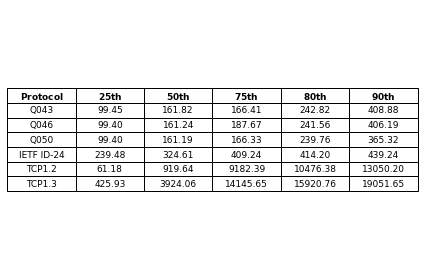

In [77]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/handshake_times_ipv4_percentile.png', format='png', bbox_inches='tight')

In [78]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24', x6)
write_percentiles('Q043.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


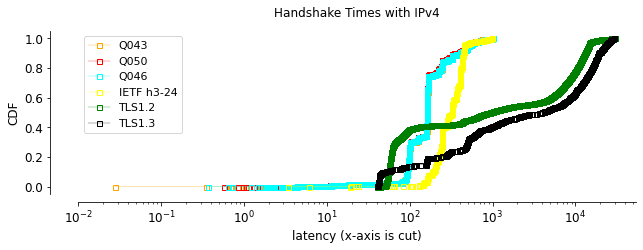

In [79]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color='yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01, 54000])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'16th May - \'20thMay')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [80]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic50['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic46['TTFB'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TTFB'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

In [81]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [82]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:241.485000

25th Percentile:250.639000

40th Percentile:310.348000

50th Percentile:327.931000

60th Percentile:366.016000

75th Percentile:408.248000

80th Percentile:451.368000

90th Percentile:735.092000

99th Percentile:980.548000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:459.268000

25th Percentile:549.023000

40th Percentile:966.013000

50th Percentile:1619.925000

60th Percentile:5608.015000

75th Percentile:9731.474000

80th Percentile:11030.117000

90th Percentile:13610.992000

99th Percentile:20128.836000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:241.865000

25th Percentile:251.673000

40th Percentile:312.692000

50th Percentile:328.031000

60th Percentile:366.196000

75th Percentile:408.802000

80th Percentile:487.276000

90th Percent

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


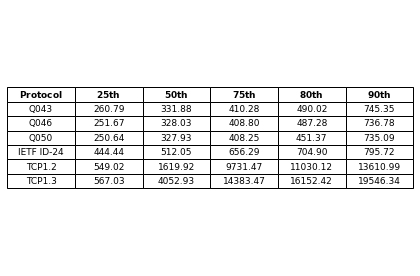

In [83]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/TTFB_ipv4_percentile.png', format='png', bbox_inches='tight')

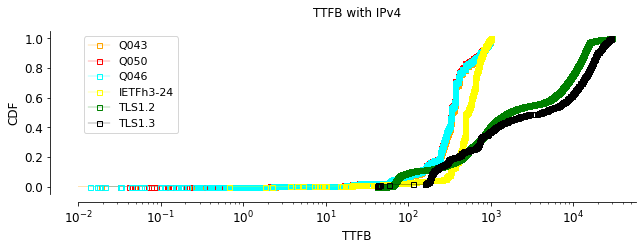

In [84]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETFh3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [85]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TotalDownloadTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

In [86]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [87]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:241.497000

25th Percentile:250.764000

40th Percentile:312.570000

50th Percentile:328.266000

60th Percentile:367.158000

75th Percentile:483.570000

80th Percentile:571.628000

90th Percentile:795.003000

99th Percentile:980.664000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:478.432000

25th Percentile:600.944000

40th Percentile:1032.397000

50th Percentile:1781.998000

60th Percentile:5688.635000

75th Percentile:9820.052000

80th Percentile:11125.213000

90th Percentile:13708.379000

99th Percentile:20456.892000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:241.636000

25th Percentile:251.389000

40th Percentile:314.779000

50th Percentile:328.538000

60th Percentile:367.395000

75th Percentile:488.590000

80th Percentile:594.823000

90th Percen

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


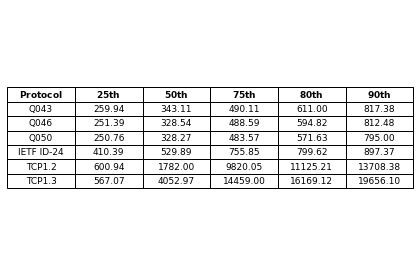

In [88]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/SaoPaulo/TotalDownloadTime_ipv4_percentile.png', format='png', bbox_inches='tight')

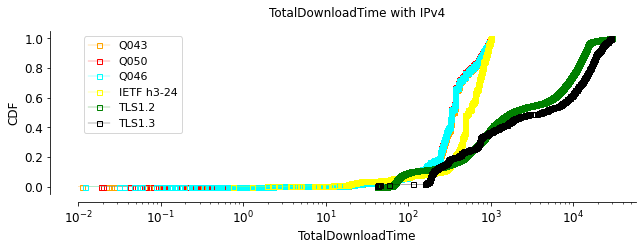

In [89]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/SaoPaulo/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')